## ASET (4th week): Data preprocessing and visualization

### Install packages

#### Ubuntu

In [3]:
!yes | conda install -c conda-forge librosa 
# # !pip install http://download.pytorch.org/whl/cpu/torch-1.0.0-cp36-cp36m-linux_x86_64.whl 
!yes | pip install torch torchvision
!yes | pip install fastai

Solving environment: done

# All requested packages already installed.

yes: standard output: Broken pipe
     |████████████████████████████████| 773.1MB 40kB/s  eta 0:00:013    |█▉                              | 44.3MB 7.6MB/s eta 0:01:36     |████▏                           | 100.1MB 3.7MB/s eta 0:03:03     |███████▏                        | 172.6MB 3.8MB/s eta 0:02:38     |███████▎                        | 174.8MB 3.8MB/s eta 0:02:38     |███████▍                        | 178.3MB 3.9MB/s eta 0:02:31     |████████                        | 191.9MB 6.2MB/s eta 0:01:34     |████████▌                       | 205.3MB 7.1MB/s eta 0:01:20     |█████████▌                      | 230.5MB 11.7MB/s eta 0:00:47     |██████████                      | 240.4MB 9.0MB/s eta 0:01:00     |██████████▌                     | 254.5MB 6.5MB/s eta 0:01:20     |██████████▊                     | 259.5MB 8.6MB/s eta 0:01:00     |██████████▉                     | 260.9MB 8.6MB/s eta 0:01:00     |██████████▉      

     |████████████████████████████████| 184kB 13.0MB/s eta 0:00:01
     |████████████████████████████████| 3.7MB 3.2MB/s eta 0:00:01
     |████████████████████████████████| 2.1MB 13.9MB/s eta 0:00:01
  Created wheel for fastai: filename=fastai-1.0.59-cp37-none-any.whl size=235957 sha256=ffdd64c638509465dfbfaca07b933c7a3cd175d68e4ed12d06db81eb701817ad
  Stored in directory: /home/sergiu/.cache/pip/wheels/45/3e/33/2286dfb90e4d3e197356552c0743678bb158d47f6e05540029
  Created wheel for bottleneck: filename=Bottleneck-1.2.1-cp37-cp37m-linux_x86_64.whl size=332360 sha256=572f15af1d90233f3881748c90b604377cfd8bba58ad7255d6b8b56823c5ddb5
  Stored in directory: /home/sergiu/.cache/pip/wheels/f2/bf/ec/e0f39aa27001525ad455139ee57ec7d0776fe074dfd78c97e4
  Created wheel for pyyaml: filename=PyYAML-5.1.2-cp37-cp37m-linux_x86_64.whl size=44103 sha256=1df0a1662ce7a18e6eb27ead7e9436d540cb7fa10044801fef92b0b83008e195
  Stored in directory: /home/sergiu/.cache/pip/wheels/d9/45/dd/65f0b38450c47cf7e5312883d

#### Windows

In [2]:
# pip install librosa
# pip3 install torch==1.2.0+cpu torchvision==0.4.0+cpu -f https://download.pytorch.org/whl/torch_stable.html
# pip install fastai
# pip install Pillow

### Import dependencies

In [4]:
import zipfile
import os
import warnings
warnings.filterwarnings("ignore")

This Python 3 environment comes with many helpful analytics libraries installed. It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python. For example, here's several helpful packages to load in: 

In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from pathlib import Path
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
import IPython
import IPython.display
import PIL
import random

# librosa
import librosa
import librosa.display

# fastai
from fastai import *
from fastai.vision import *
from fastai.vision.data import *
# Thanks to https://nbviewer.jupyter.org/github/fastai/course-v3/blob/master/nbs/dl1/lesson6-pets-more.ipynb
from fastai.callbacks.hooks import *

### Environment preparation

In case the path of your jupyter notebook is not set correctly, uncomment and run with your project path the following command:

In [7]:
os.chdir('/home/sergiu/Projects/PycharmProjects/moc1-aset-project')

### Dataset retrieval

#### Method 1 - By using the Kaggle API (fastest manner)

**Step 1**:  Access https://github.com/Kaggle/kaggle-api/issues/15#issuecomment-374432095 to see how to add the API token keys. 

**Step 2**:

In [8]:
!pip install kaggle

**Step 3**:

In [10]:
!kaggle competitions download -c freesound-audio-tagging-2019

100%|█████████████████████████████████████▉| 24.4G/24.4G [45:54<00:00, 7.96MB/s]
100%|██████████████████████████████████████| 24.4G/24.4G [45:54<00:00, 9.50MB/s]


#### Method 2: Using wget (slower - download is limited to 1.8MB/s)

In [11]:
# !wget https://www.kaggle.com/c/10700/download-all

In [11]:
!mkdir data
!mv freesound-audio-tagging-2019.zip data/

### Data preparation and loading

In [12]:
zip_path = 'data/freesound-audio-tagging-2019.zip'
import zipfile
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('data/')
    os.remove(zip_path)

In [13]:
os.listdir('data/')

['train_curated.zip',
 'test.zip',
 'train_noisy.csv',
 'sample_submission.csv',
 'train_noisy.zip',
 'train_curated.csv']

In [14]:
zips = ['train_curated', 'train_noisy', 'test']
for zip_name in zips:
    zip_path = f'data/{zip_name}.zip'
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(f'data/{zip_name}/')
        os.remove(zip_path)

Input data files are available in the "../input/" directory. For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory.

In [15]:
os.listdir('data/')

['train_curated',
 'train_noisy.csv',
 'sample_submission.csv',
 'test',
 'train_noisy',
 'train_curated.csv']

Any results you write to the current directory are saved as output.

### Data preprocessing

#### Dataset brief description

File/folder definitions:
-  **df** will handle training data.
-  **test_df** will handle test data.

In [16]:
DATA = os.path.abspath('data')
CSV_TRN_CURATED = os.path.join(DATA, 'train_curated.csv')
CSV_TRN_NOISY = os.path.join(DATA,'train_noisy.csv')
CSV_SUBMISSION = os.path.join(DATA,'sample_submission.csv')
TRN_CURATED = os.path.join(DATA,'train_curated')
TRN_NOISY = os.path.join(DATA,'train_noisy')
TEST = os.path.join(DATA,'test')

In [17]:
WORK = os.path.abspath('work')
IMG_TRN_CURATED = os.path.join(WORK, 'image/trn_curated')
IMG_TRN_NOISY = os.path.join(WORK, 'image/train_noisy')
IMG_TEST = os.path.join(WORK, 'image/test')

In [18]:
for folder in [WORK, IMG_TRN_CURATED, IMG_TRN_NOISY, IMG_TEST]: 
    Path(folder).mkdir(exist_ok=True, parents=True)

In [19]:
df = pd.read_csv(CSV_TRN_CURATED)
df_noisy = pd.read_csv(CSV_TRN_NOISY)
test_df = pd.read_csv(CSV_SUBMISSION)

In [20]:
df.head()

,fname,labels
0,0006ae4e.wav,Bark
1,0019ef41.wav,Raindrop
2,001ec0ad.wav,Finger_snapping
3,0026c7cb.wav,Run
4,0026f116.wav,Finger_snapping


In [21]:
test_df.head()

,fname,Accelerating_and_revving_and_vroom,Accordion,Acoustic_guitar,Applause,Bark,Bass_drum,Bass_guitar,Bathtub_(filling_or_washing),Bicycle_bell,...,Toilet_flush,Traffic_noise_and_roadway_noise,Trickle_and_dribble,Walk_and_footsteps,Water_tap_and_faucet,Waves_and_surf,Whispering,Writing,Yell,Zipper_(clothing)
0,4260ebea.wav,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,426eb1e0.wav,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,428d70bb.wav,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4292b1c9.wav,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,429c5071.wav,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
df.describe()

,fname,labels
count,4970,4970
unique,4970,213
top,ed33c221.wav,Computer_keyboard
freq,1,75


In [23]:
test_df.describe()

,Accelerating_and_revving_and_vroom,Accordion,Acoustic_guitar,Applause,Bark,Bass_drum,Bass_guitar,Bathtub_(filling_or_washing),Bicycle_bell,Burping_and_eructation,...,Toilet_flush,Traffic_noise_and_roadway_noise,Trickle_and_dribble,Walk_and_footsteps,Water_tap_and_faucet,Waves_and_surf,Whispering,Writing,Yell,Zipper_(clothing)
count,3361.0,3361.0,3361.0,3361.0,3361.0,3361.0,3361.0,3361.0,3361.0,3361.0,...,3361.0,3361.0,3361.0,3361.0,3361.0,3361.0,3361.0,3361.0,3361.0,3361.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
df['labels'].value_counts()

Computer_keyboard                                            75
Scissors                                                     75
Marimba_and_xylophone                                        75
Zipper_(clothing)                                            75
Skateboard                                                   75
                                                             ..
Trickle_and_dribble,Bathtub_(filling_or_washing),Gurgling     1
Hiss,Bus                                                      1
Chirp_and_tweet,Cricket                                       1
Car_passing_by,Race_car_and_auto_racing                       1
Crowd,Yell                                                    1
Name: labels, Length: 213, dtype: int64

In [25]:
str(len(set(list(df['labels'])))) + ' different sounds covered in the train dataframe'

'213 different sounds covered in the train dataframe'

### Read audio files

In [26]:
def read_audio(conf, pathname, trim_long_data):
    y, sr = librosa.load(pathname, sr=conf.sampling_rate)
    # trim silence
    if 0 < len(y): # workaround: 0 length causes error
        y, _ = librosa.effects.trim(y) # trim, top_db=default(60)
    # make it unified length to conf.samples
    if len(y) > conf.samples: # long enough
        if trim_long_data:
            y = y[0:0+conf.samples]
    else: # pad blank
        padding = conf.samples - len(y)    # add padding at both ends
        offset = padding // 2
        y = np.pad(y, (offset, conf.samples - len(y) - offset), 'constant')
    return y

### Convert audio files to an equivalent spectogram

In [27]:
def save(path, obj):
    with open(path, 'wb') as handle:
        pickle.dump(obj, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [28]:
def load(path):
    with open(path, 'rb') as handle:
        return pickle.load(handle)

In [29]:
def audio_to_melspectrogram(conf, audio):
    spectrogram = librosa.feature.melspectrogram(audio, 
                                                 sr=conf.sampling_rate,
                                                 n_mels=conf.n_mels,
                                                 hop_length=conf.hop_length,
                                                 n_fft=conf.n_fft,
                                                 fmin=conf.fmin,
                                                 fmax=conf.fmax)
    spectrogram = librosa.power_to_db(spectrogram)
    spectrogram = spectrogram.astype(np.float32)
    return spectrogram

In [30]:
def show_melspectrogram(conf, mels, title='Log-frequency power spectrogram'):
    librosa.display.specshow(mels, x_axis='time', y_axis='mel', 
                             sr=conf.sampling_rate, hop_length=conf.hop_length,
                            fmin=conf.fmin, fmax=conf.fmax)
    plt.colorbar(format='%+2.0f dB')
    plt.title(title)
    plt.show()

In [31]:
def read_as_melspectrogram(conf, pathname, trim_long_data, debug_display=False):
    x = read_audio(conf, pathname, trim_long_data)
    mels = audio_to_melspectrogram(conf, x)
    if debug_display:
        IPython.display.display(IPython.display.Audio(x, rate=conf.sampling_rate))
        show_melspectrogram(conf, mels)
    return mels

In [32]:
class conf:
    # Preprocessing settings
    sampling_rate = 44100
    duration = 2
    hop_length = 347*duration # to make time steps 128
    fmin = 20
    fmax = sampling_rate // 2
    n_mels = 128
    n_fft = n_mels * 20
    samples = sampling_rate * duration

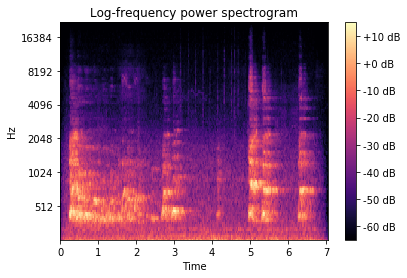

In [33]:
# example
x = read_as_melspectrogram(conf, os.path.join(TRN_CURATED,'0006ae4e.wav'), trim_long_data=False, debug_display=True)

In [34]:
def mono_to_color(X, mean=None, std=None, norm_max=None, norm_min=None, eps=1e-6):
    # Stack X as [X,X,X]
    X = np.stack([X, X, X], axis=-1)

    # Standardize
    mean = mean or X.mean()
    std = std or X.std()
    Xstd = (X - mean) / (std + eps)
    _min, _max = Xstd.min(), Xstd.max()
    norm_max = norm_max or _max
    norm_min = norm_min or _min
    if (_max - _min) > eps:
        # Scale to [0, 255]
        V = Xstd
        V[V < norm_min] = norm_min
        V[V > norm_max] = norm_max
        V = 255 * (V - norm_min) / (norm_max - norm_min)
        V = V.astype(np.uint8)
    else:
        # Just zero
        V = np.zeros_like(Xstd, dtype=np.uint8)
    return V

In [35]:
def convert_wav_to_image(df, source, img_dest):
    X = []
    for i, row in tqdm_notebook(df.iterrows()):
        x = read_as_melspectrogram(conf, os.path.join(source, str(row.fname)), trim_long_data=False)
        x_color = mono_to_color(x)
        save(os.path.join(img_dest, str(row.fname)), x_color)
        X.append(x_color)
    return X

### Build the classification model

In [38]:
X_train = convert_wav_to_image(df, source=TRN_CURATED, img_dest=IMG_TRN_CURATED)
X_test = convert_wav_to_image(test_df, source=TEST, img_dest=IMG_TEST)

In [39]:
CUR_X_FILES, CUR_X = list(df.fname.values), X_train

In [40]:
def open_fat2019_image(fn, convert_mode, after_open)->Image:
    # open
    idx = CUR_X_FILES.index(fn.split('/')[-1])
    x = PIL.Image.fromarray(CUR_X[idx])
    # crop
    time_dim, base_dim = x.size
    crop_x = random.randint(0, time_dim - base_dim)
    x = x.crop([crop_x, 0, crop_x+base_dim, base_dim])    
    # standardize
    return Image(pil2tensor(x, np.float32).div_(255))

In [41]:
vision.data.open_image = open_fat2019_image

In [42]:
# from official code https://colab.research.google.com/drive/1AgPdhSp7ttY18O3fEoHOQKlt_3HJDLi8#scrollTo=cRCaCIb9oguU
def _one_sample_positive_class_precisions(scores, truth):
    """Calculate precisions for each true class for a single sample.

    Args:
      scores: np.array of (num_classes,) giving the individual classifier scores.
      truth: np.array of (num_classes,) bools indicating which classes are true.

    Returns:
      pos_class_indices: np.array of indices of the true classes for this sample.
      pos_class_precisions: np.array of precisions corresponding to each of those
        classes.
    """
    num_classes = scores.shape[0]
    pos_class_indices = np.flatnonzero(truth > 0)
    
    # Only calculate precisions if there are some true classes.
    if not len(pos_class_indices):
        return pos_class_indices, np.zeros(0)
    
    # Retrieval list of classes for this sample.
    retrieved_classes = np.argsort(scores)[::-1]
    
    # class_rankings[top_scoring_class_index] == 0 etc.
    class_rankings = np.zeros(num_classes, dtype=np.int)
    class_rankings[retrieved_classes] = range(num_classes)
    
    # Which of these is a true label?
    retrieved_class_true = np.zeros(num_classes, dtype=np.bool)
    retrieved_class_true[class_rankings[pos_class_indices]] = True
    
    # Num hits for every truncated retrieval list.
    retrieved_cumulative_hits = np.cumsum(retrieved_class_true)
    
    # Precision of retrieval list truncated at each hit, in order of pos_labels.
    precision_at_hits = (
            retrieved_cumulative_hits[class_rankings[pos_class_indices]] /
            (1 + class_rankings[pos_class_indices].astype(np.float)))
    return pos_class_indices, precision_at_hits

In [43]:
def calculate_per_class_lwlrap(truth, scores):
    """Calculate label-weighted label-ranking average precision.

    Arguments:
      truth: np.array of (num_samples, num_classes) giving boolean ground-truth
        of presence of that class in that sample.
      scores: np.array of (num_samples, num_classes) giving the classifier-under-
        test's real-valued score for each class for each sample.

    Returns:
      per_class_lwlrap: np.array of (num_classes,) giving the lwlrap for each
        class.
      weight_per_class: np.array of (num_classes,) giving the prior of each
        class within the truth labels.  Then the overall unbalanced lwlrap is
        simply np.sum(per_class_lwlrap * weight_per_class)
    """
    assert truth.shape == scores.shape
    num_samples, num_classes = scores.shape
   
    # Space to store a distinct precision value for each class on each sample.
    # Only the classes that are true for each sample will be filled in.
    precisions_for_samples_by_classes = np.zeros((num_samples, num_classes))
    
    for sample_num in range(num_samples):
        pos_class_indices, precision_at_hits = (
            _one_sample_positive_class_precisions(scores[sample_num, :],
                                                  truth[sample_num, :]))
        precisions_for_samples_by_classes[sample_num, pos_class_indices] = (
            precision_at_hits)
    labels_per_class = np.sum(truth > 0, axis=0)
    weight_per_class = labels_per_class / float(np.sum(labels_per_class))
    
    # Form average of each column, i.e. all the precisions assigned to labels in
    # a particular class.
    per_class_lwlrap = (np.sum(precisions_for_samples_by_classes, axis=0) /
                        np.maximum(1, labels_per_class))
    
    # overall_lwlrap = simple average of all the actual per-class, per-sample precisions
    #                = np.sum(precisions_for_samples_by_classes) / np.sum(precisions_for_samples_by_classes > 0)
    #           also = weighted mean of per-class lwlraps, weighted by class label prior across samples
    #                = np.sum(per_class_lwlrap * weight_per_class)
    return per_class_lwlrap, weight_per_class

#### Build a wrapper over fast.ai library

In [44]:
def lwlrap(scores, truth, **kwargs):
    score, weight = calculate_per_class_lwlrap(to_np(truth), to_np(scores))
    return torch.Tensor([(score * weight).sum()])

In [47]:
tfms = get_transforms(
    do_flip=True, max_rotate=0, 
    max_lighting=0.1, max_zoom=0, max_warp=0.)
src = (ImageList.from_csv(
    os.path.join(WORK, 'image'), 
    os.path.join(Path('../../'),CSV_TRN_CURATED), 
    folder='trn_curated')
       .split_by_rand_pct(0.2)
       .label_from_df(label_delim=','))
data = (src.transform(tfms, size=128)
        .databunch(bs=64).normalize(imagenet_stats))

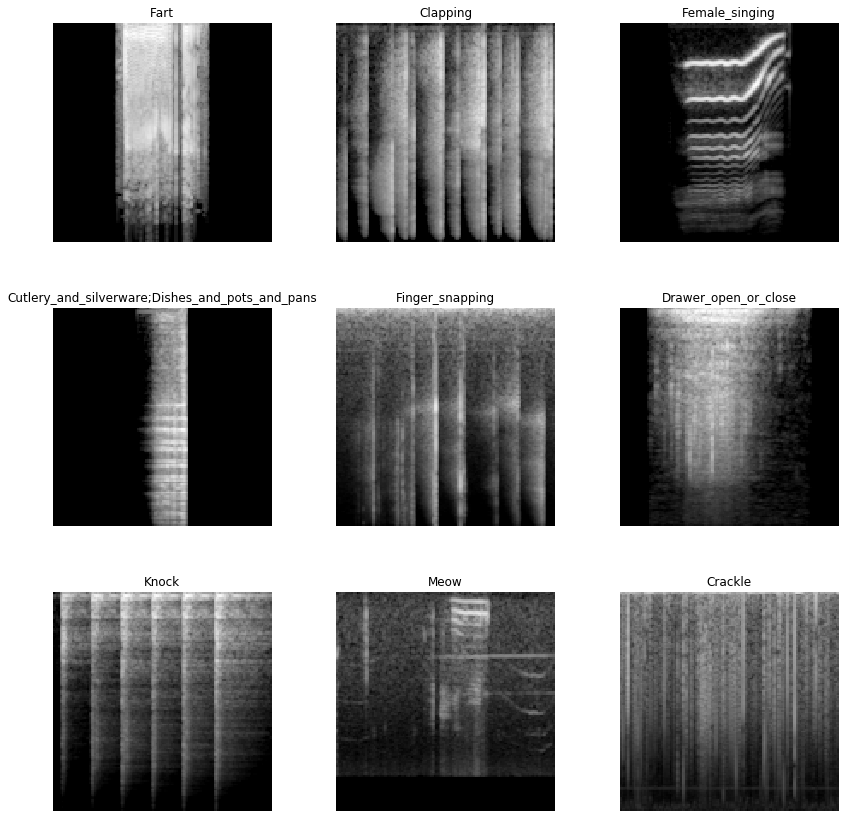

In [48]:
data.show_batch(3)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


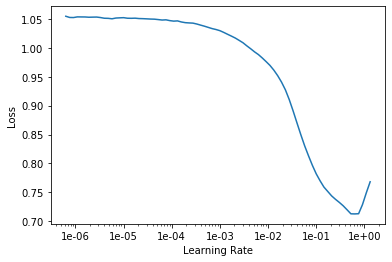

In [49]:
learn = cnn_learner(data, models.resnet18, pretrained=False, metrics=[lwlrap])
learn.unfreeze()

learn.lr_find(); learn.recorder.plot()

In [50]:
learn.fit_one_cycle(5, 1e-1)
learn.fit_one_cycle(10, 1e-2)

epoch,train_loss,valid_loss,lwlrap,time
0,0.256257,0.475563,0.107255,00:04
1,0.126531,0.074050,0.121918,00:04
2,0.089667,0.069921,0.183374,00:04
3,0.075277,0.064865,0.238139,00:04
4,0.068397,0.062012,0.294844,00:05


epoch,train_loss,valid_loss,lwlrap,time
0,0.064291,0.061762,0.291204,00:05
1,0.064441,0.061374,0.302189,00:04
2,0.064571,0.061439,0.296042,00:04
3,0.064053,0.064707,0.238284,00:04
4,0.062578,0.060563,0.310892,00:04
5,0.060874,0.060001,0.307902,00:04
6,0.058687,0.062706,0.293231,00:04
7,0.055855,0.052650,0.430640,00:04
8,0.054311,0.051432,0.447152,00:04
9,0.053502,0.051274,0.454893,00:04


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


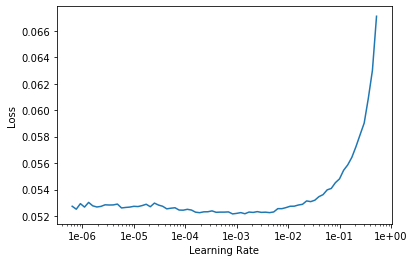

In [51]:
learn.lr_find(); learn.recorder.plot()

In [52]:
learn.fit_one_cycle(20, 3e-3)

epoch,train_loss,valid_loss,lwlrap,time
0,0.052286,0.050919,0.463444,00:04
1,0.052419,0.051483,0.459162,00:04
2,0.052479,0.050914,0.460376,00:04
3,0.052764,0.137253,0.361678,00:04
4,0.052221,0.050262,0.463973,00:04
5,0.051745,0.061253,0.404996,00:04
6,0.050682,0.054916,0.457336,00:04
7,0.049324,0.049357,0.485612,00:04
8,0.047905,0.045259,0.532703,00:04
9,0.046492,0.045178,0.541416,00:04


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


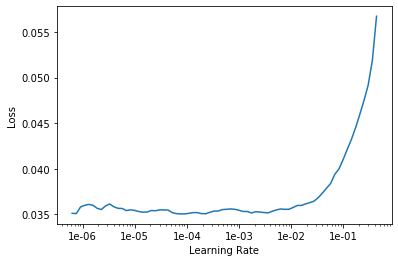

In [53]:
learn.lr_find(); learn.recorder.plot()

In [54]:
learn.fit_one_cycle(20, 1e-3)

epoch,train_loss,valid_loss,lwlrap,time
0,0.035403,0.037508,0.642463,00:05
1,0.035527,0.037925,0.640848,00:04
2,0.035395,0.038986,0.631874,00:04
3,0.035654,0.038178,0.632480,00:04
4,0.035494,0.037882,0.635199,00:04
5,0.035467,0.045968,0.588748,00:04
6,0.035228,0.043404,0.572273,00:04
7,0.034186,0.037849,0.641657,00:04
8,0.033900,0.037859,0.640625,00:04
9,0.033165,0.036554,0.650112,00:04


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


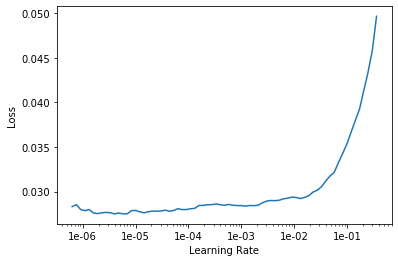

In [55]:
learn.lr_find(); learn.recorder.plot()

In [62]:
learn.fit_one_cycle(50, slice(1e-3, 3e-3))

epoch,train_loss,valid_loss,lwlrap,time


ValueError: Caught ValueError in DataLoader worker process 0.
Original Traceback (most recent call last):
  File "/home/sergiu/anaconda3/envs/oc/lib/python3.7/site-packages/torch/utils/data/_utils/worker.py", line 178, in _worker_loop
    data = fetcher.fetch(index)
  File "/home/sergiu/anaconda3/envs/oc/lib/python3.7/site-packages/torch/utils/data/_utils/fetch.py", line 44, in fetch
    data = [self.dataset[idx] for idx in possibly_batched_index]
  File "/home/sergiu/anaconda3/envs/oc/lib/python3.7/site-packages/torch/utils/data/_utils/fetch.py", line 44, in <listcomp>
    data = [self.dataset[idx] for idx in possibly_batched_index]
  File "/home/sergiu/anaconda3/envs/oc/lib/python3.7/site-packages/fastai/data_block.py", line 651, in __getitem__
    if self.item is None: x,y = self.x[idxs],self.y[idxs]
  File "/home/sergiu/anaconda3/envs/oc/lib/python3.7/site-packages/fastai/data_block.py", line 120, in __getitem__
    if isinstance(idxs, Integral): return self.get(idxs)
  File "/home/sergiu/anaconda3/envs/oc/lib/python3.7/site-packages/fastai/vision/data.py", line 271, in get
    res = self.open(fn)
  File "/home/sergiu/anaconda3/envs/oc/lib/python3.7/site-packages/fastai/vision/data.py", line 267, in open
    return open_image(fn, convert_mode=self.convert_mode, after_open=self.after_open)
  File "<ipython-input-40-d5245feb5ab7>", line 3, in open_fat2019_image
    idx = CUR_X_FILES.index(fn.split('/')[-1])
ValueError: '9f1f76ea.wav' is not in list


In [64]:
learn.fit_one_cycle(10, slice(1e-4, 1e-3))

epoch,train_loss,valid_loss,lwlrap,time


ValueError: Caught ValueError in DataLoader worker process 0.
Original Traceback (most recent call last):
  File "/home/sergiu/anaconda3/envs/oc/lib/python3.7/site-packages/torch/utils/data/_utils/worker.py", line 178, in _worker_loop
    data = fetcher.fetch(index)
  File "/home/sergiu/anaconda3/envs/oc/lib/python3.7/site-packages/torch/utils/data/_utils/fetch.py", line 44, in fetch
    data = [self.dataset[idx] for idx in possibly_batched_index]
  File "/home/sergiu/anaconda3/envs/oc/lib/python3.7/site-packages/torch/utils/data/_utils/fetch.py", line 44, in <listcomp>
    data = [self.dataset[idx] for idx in possibly_batched_index]
  File "/home/sergiu/anaconda3/envs/oc/lib/python3.7/site-packages/fastai/data_block.py", line 651, in __getitem__
    if self.item is None: x,y = self.x[idxs],self.y[idxs]
  File "/home/sergiu/anaconda3/envs/oc/lib/python3.7/site-packages/fastai/data_block.py", line 120, in __getitem__
    if isinstance(idxs, Integral): return self.get(idxs)
  File "/home/sergiu/anaconda3/envs/oc/lib/python3.7/site-packages/fastai/vision/data.py", line 271, in get
    res = self.open(fn)
  File "/home/sergiu/anaconda3/envs/oc/lib/python3.7/site-packages/fastai/vision/data.py", line 267, in open
    return open_image(fn, convert_mode=self.convert_mode, after_open=self.after_open)
  File "<ipython-input-40-d5245feb5ab7>", line 3, in open_fat2019_image
    idx = CUR_X_FILES.index(fn.split('/')[-1])
ValueError: 'dcddad32.wav' is not in list


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f297b0bf290>
Traceback (most recent call last):
  File "/home/sergiu/anaconda3/envs/oc/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 926, in __del__
    self._shutdown_workers()
  File "/home/sergiu/anaconda3/envs/oc/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 906, in _shutdown_workers
    w.join()
  File "/home/sergiu/anaconda3/envs/oc/lib/python3.7/multiprocessing/process.py", line 140, in join
    res = self._popen.wait(timeout)
  File "/home/sergiu/anaconda3/envs/oc/lib/python3.7/multiprocessing/popen_fork.py", line 48, in wait
    return self.poll(os.WNOHANG if timeout == 0.0 else 0)
  File "/home/sergiu/anaconda3/envs/oc/lib/python3.7/multiprocessing/popen_fork.py", line 28, in poll
    pid, sts = os.waitpid(self.pid, flag)
KeyboardInterrupt: 


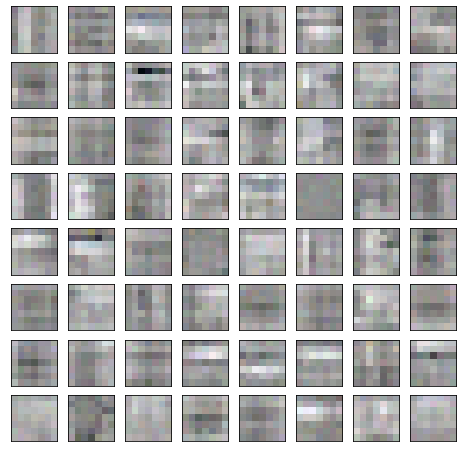

In [63]:
# https://discuss.pytorch.org/t/how-to-visualize-the-actual-convolution-filters-in-cnn/13850
from sklearn.preprocessing import minmax_scale

def visualize_first_layer(learn, save_name=None):
    conv1 = list(learn.model.children())[0][0]
    if isinstance(conv1, torch.nn.modules.container.Sequential):
        conv1 = conv1[0] # for some models, 1 layer inside
    weights = conv1.weight.data.cpu().numpy()
    weights_shape = weights.shape
    weights = minmax_scale(weights.ravel()).reshape(weights_shape)
    fig, axes = plt.subplots(8, 8, figsize=(8,8))
    for i, ax in enumerate(axes.flat):
        ax.imshow(np.rollaxis(weights[i], 0, 3))
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    if save_name:
        fig.savefig(str(save_name))

visualize_first_layer(learn)

In [59]:
learn.save('fat2019_fastai_cnn2d_stage-2')
learn.export()

In [60]:
CUR_X_FILES, CUR_X = list(test_df.fname.values), X_test

test = ImageList.from_csv(WORK/'image', Path('../..')/CSV_SUBMISSION, folder='test')
learn = load_learner(WORK/'image', test=test)
preds, _ = learn.TTA(ds_type=DatasetType.Test) # <== Simply replacing from learn.get_preds()

TypeError: unsupported operand type(s) for /: 'str' and 'str'

In [ ]:
test_df[learn.data.classes] = preds
test_df.to_csv('submission.csv', index=False)
test_df.head()

In [ ]:
CUR_X_FILES, CUR_X = list(df.fname.values), X_train
learn = cnn_learner(data, models.resnet18, pretrained=False, metrics=[lwlrap])
learn.load('fat2019_fastai_cnn2d_stage-2');

In [ ]:
CUR_X_FILES, CUR_X = list(df.fname.values), X_train
learn = cnn_learner(data, models.resnet18, pretrained=False, metrics=[lwlrap])
learn.load('fat2019_fastai_cnn2d_stage-2');

In [ ]:
def visualize_cnn_by_cam(learn, data_index):
    x, _y = learn.data.valid_ds[data_index]
    y = _y.data
    if not isinstance(y, (list, np.ndarray)): # single label -> one hot encoding
        y = np.eye(learn.data.valid_ds.c)[y]

    m = learn.model.eval()
    xb,_ = learn.data.one_item(x)
    xb_im = Image(learn.data.denorm(xb)[0])
    xb = xb.cuda()

    def hooked_backward(cat):
        with hook_output(m[0]) as hook_a: 
            with hook_output(m[0], grad=True) as hook_g:
                preds = m(xb)
                preds[0,int(cat)].backward()
        return hook_a,hook_g
    def show_heatmap(img, hm, label):
        _,axs = plt.subplots(1, 2)
        axs[0].set_title(label)
        img.show(axs[0])
        axs[1].set_title(f'CAM of {label}')
        img.show(axs[1])
        axs[1].imshow(hm, alpha=0.6, extent=(0,img.shape[0],img.shape[0],0),
                      interpolation='bilinear', cmap='magma');
        plt.show()

    for y_i in np.where(y > 0)[0]:
        hook_a,hook_g = hooked_backward(cat=y_i)
        acts = hook_a.stored[0].cpu()
        grad = hook_g.stored[0][0].cpu()
        grad_chan = grad.mean(1).mean(1)
        mult = (acts*grad_chan[...,None,None]).mean(0)
        show_heatmap(img=xb_im, hm=mult, label=str(learn.data.valid_ds.y[data_index]))

In [ ]:
for idx in range(10):
    visualize_cnn_by_cam(learn, idx)

### References:

1. https://www.kaggle.com/daisukelab/cnn-2d-basic-solution-powered-by-fast-ai?fbclid=IwAR35ItZNHdxy1SsAMrz_KLHoQP_DJhXbaf24K9_FQop9p9ggMb-iuPmiqNg